In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr_frozen_09272019.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(65064, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & (lsl_dr.hl==0)
                  & ((lsl_dr.autism==0)))

In [6]:
autism_subset = lsl_dr[inclusion_mask]
autism_subset.drop_duplicates(subset='study_id').shape

(4527, 246)

## Demographics

In [7]:
autism_subset.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      25089
Female    23836
Name: male, dtype: int64

In [8]:
autism_subset.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       29629
Black        5819
Hispanic     5264
Other        4741
Asian        2736
Missing       736
Name: race, dtype: int64

In [9]:
(autism_subset.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    36412
<36 weeks     12513
Name: premature_age, dtype: int64

In [10]:
autism_subset.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1          11841
2          19200
3           9712
4+          5594
Missing     2578
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

autism_subset.mother_ed.replace(ed_lookup).value_counts()

Some high school           15042
High school diploma/GED    13364
Unknown                    12054
Some college                7232
8th grade or less           1233
Name: mother_ed, dtype: int64

In [12]:
autism_subset.father_ed.replace(ed_lookup).value_counts()

Unknown                    14724
Bachelor's degree          11192
High school diploma/GED     7518
Some college                7290
Post graduate degree        6853
Some high school            1181
8th grade or less            167
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

autism_subset.family_inv.replace(family_lookup).value_counts()

Ideal Participation      15477
Good Participation       12505
Average Participation    10828
Missing                   5806
Below Average             3377
Limited Participation      932
Name: family_inv, dtype: int64

In [14]:
autism_subset[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,43804.000000,42062.000000,40601.000000,48649.000000
mean,11.532114,16.586462,17.147829,29.260817
std,16.524365,17.338081,17.523954,24.888271
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,4.000000,10.000000
50%,3.000000,10.000000,12.000000,25.000000
75%,18.000000,24.000000,24.000000,39.000000
max,160.000000,173.000000,200.000000,227.000000


In [15]:
autism_subset.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION only         25370
OPTION + outside     8355
Missing              5764
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
autism_subset.degree_hl_ad.isnull().sum()

1093

In [17]:
autism_subset.degree_hl_as.isnull().sum()

1173

In [18]:
autism_subset.degree_hl_ad.value_counts()

6.0    21448
3.0     6974
4.0     6730
5.0     6119
2.0     3851
0.0     1499
1.0     1211
Name: degree_hl_ad, dtype: int64

In [19]:
autism_subset.degree_hl_as.value_counts()

6.0    21367
3.0     7311
4.0     6347
5.0     5889
2.0     3712
0.0     1797
1.0     1329
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = autism_subset.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
autism_subset.one_or_both_parent_hl.value_counts()

0.0    38305
1.0     2526
Name: one_or_both_parent_hl, dtype: int64

In [22]:
autism_subset.one_or_both_parent_hl.isnull().sum()

8094

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['0625-2018-0055', '0625-2018-0055', '0625-2018-0055', ...,
       '0102-2010-3021', '0102-2010-3021', '0102-2010-3021'], dtype=object)

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      37814
unilateral_snhl      2009
bilateral_cond       1838
bilateral_ansd       1612
assymetrical         1337
bilateral_mixed      1173
unilateral_cond      1086
unilateral_mixed      172
unilateral_ansd       159
bilateral_normal       52
unilateral_unk          0
bilateral_unk           0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.77
unilateral_snhl     0.04
bilateral_cond      0.04
assymetrical        0.03
bilateral_ansd      0.03
unilateral_cond     0.02
bilateral_mixed     0.02
unilateral_unk      0.00
unilateral_mixed    0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_normal    0.00
dtype: float64

In [26]:
tech_data = autism_subset.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        32238
bilateral_ha         9872
bimodal              2999
unilateral_ha        1387
unilateral_ci        1018
bilateral_other       166
unilateral_other       69
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.66
bilateral_ha        0.20
bimodal             0.06
unilateral_ha       0.03
unilateral_ci       0.02
unilateral_other    0.00
bilateral_other     0.00
dtype: float64

## Hearing Loss

In [29]:
autism_subset.columns[autism_subset.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [30]:
hl_data = autism_subset.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [31]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     18244
bilateral_hl_moderate      4710
bilateral_hl_modsev        3501
bilateral_hl_severe        2947
bilateral_hl_mild          2243
unilateral_hl_modsev        778
unilateral_hl_profound      771
unilateral_hl_severe        590
unilateral_hl_moderate      521
bilateral_hl_slight         468
unilateral_hl_mild          353
unilateral_hl_slight        161
bilateral_hl_normal          49
dtype: int64

In [32]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.37
bilateral_hl_moderate     0.10
bilateral_hl_modsev       0.07
bilateral_hl_severe       0.06
bilateral_hl_mild         0.05
unilateral_hl_profound    0.02
unilateral_hl_modsev      0.02
unilateral_hl_severe      0.01
unilateral_hl_moderate    0.01
unilateral_hl_mild        0.01
bilateral_hl_slight       0.01
unilateral_hl_slight      0.00
bilateral_hl_normal       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [33]:
(autism_subset[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

1207

## Summary of scores by domain

In [34]:
test_scores = lsl_dr[inclusion_mask].copy()

In [35]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [36]:
test_scores.groupby('domain').score_adj.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,5082.0,79.5,17.5,9.7,69.5,80.9,92.4,121.5
Expressive Language,9596.0,84.2,20.7,0.0,69.0,85.0,99.0,150.0
Expressive Vocabulary,7336.0,90.4,19.0,0.0,78.0,91.0,103.0,150.0
Language,9788.0,84.3,21.7,0.0,68.0,84.0,100.0,250.0
Receptive Language,9510.0,86.6,20.3,0.0,72.6,87.0,101.0,150.2
Receptive Vocabulary,7613.0,88.5,17.9,10.0,77.0,89.0,101.0,160.0


In [37]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Language',
       'Expressive Language', 'Language', 'Receptive Vocabulary',
       'Articulation'], dtype=object)

In [38]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

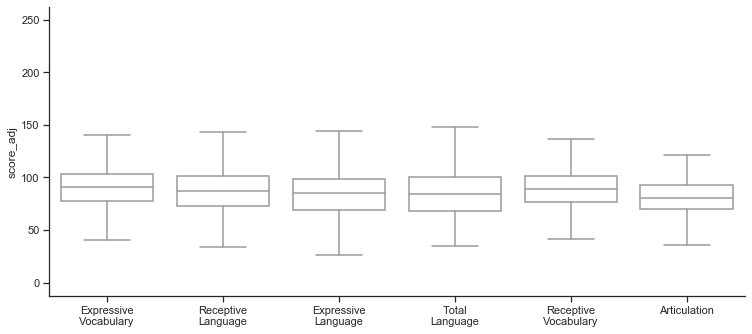

In [39]:
sns.catplot("domain_labels", y="score_adj", data=test_scores, kind="box", color='white', fliersize=0)
# sns.swarmplot("domain_labels", y="score", data=test_scores, color='grey', alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [40]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score_adj.describe())

count       mean        std  \
domain                age_amp_greater_6                                 
Articulation          False              2356.0  82.322105  16.809380   
                      True               2726.0  77.132105  17.662482   
Expressive Language   False              4831.0  88.513758  20.575571   
                      True               4765.0  79.778243  19.959542   
Expressive Vocabulary False              3426.0  92.881518  19.123941   
                      True               3910.0  88.252228  18.665724   
Language              False              4892.0  88.626939  21.698223   
                      True               4896.0  80.056737  20.879201   
Receptive Language    False              4806.0  90.334700  20.165788   
                      True               4704.0  82.729101  19.792679   
Receptive Vocabulary  False              3559.0  91.123542  17.847161   
                      True               4054.0  86.161415  17.658441   

                                               min        25%        50%  \
domain                age_amp_greater_6                                    
Articulation          False              26.117271  73.491316  82.487141   
                      True                9.694174  65.938168  79.606387   
Expressive Language   False               0.000000  74.000000  89.000000   
                      True                9.000000  65.000000  79.778804   
Expressive Vocabulary False               0.000000  80.000000  94.000000   
                      True                0.000000  76.038912  89.000000   
Language              False               0.000000  74.000000  89.000000   
                      True               34.725726  64.000000  79.000000   
Receptive Language    False               0.000000  76.000000  91.000000   
                      True               11.000000  67.923996  83.000000   
Receptive Vocabulary  False              10.000000  80.000000  92.000000   
                      True               10.778705  74.759262  86.147331   

                                                75%         max  
domain                age_amp_greater_6                          
Articulation          False               94.613301  121.467040  
                      True                90.325474  116.920355  
Expressive Language   False              103.000000  150.000000  
                      True                94.000000  150.000000  
Expressive Vocabulary False              106.000000  146.000000  
                      True               100.000000  150.000000  
Language              False              104.000000  250.000000  
                      True                95.000000  186.000000  
Receptive Language    False              105.000000  150.000000  
                      True                97.000000  150.150059  
Receptive Vocabulary  False              104.000000  160.000000  
                      True                98.000000  159.000000

Age of enrollment greater than 6mo.

In [41]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score_adj.describe())

count       mean        std  \
domain                age_enroll_greater_6                                 
Articulation          False                 2423.0  81.481716  17.136844   
                      True                  2659.0  77.767130  17.572740   
Expressive Language   False                 4711.0  87.506598  20.744108   
                      True                  4885.0  80.964117  20.217414   
Expressive Vocabulary False                 3472.0  91.943576  19.479807   
                      True                  3864.0  89.039906  18.493187   
Language              False                 4794.0  87.530079  21.982402   
                      True                  4994.0  81.277849  21.013233   
Receptive Language    False                 4698.0  89.412331  20.328673   
                      True                  4812.0  83.800317  19.966622   
Receptive Vocabulary  False                 3578.0  89.823009  17.985478   
                      True                  4035.0  87.291285  17.774954   

                                                  min        25%        50%  \
domain                age_enroll_greater_6                                    
Articulation          False                 10.778705  72.190529  81.592593   
                      True                   9.694174  67.158697  80.063849   
Expressive Language   False                 26.000000  73.000000  88.000000   
                      True                   0.000000  66.000000  80.554492   
Expressive Vocabulary False                  0.000000  78.987935  93.000000   
                      True                   0.000000  77.000000  89.526477   
Language              False                 35.374013  73.000000  88.000000   
                      True                   0.000000  65.000000  81.000000   
Receptive Language    False                 27.000000  75.000000  90.000000   
                      True                   0.000000  69.000000  84.000000   
Receptive Vocabulary  False                 10.778705  78.099164  90.928907   
                      True                  10.000000  76.000000  87.352000   

                                                   75%         max  
domain                age_enroll_greater_6                          
Articulation          False                  94.189179  121.467040  
                      True                   90.823545  116.920355  
Expressive Language   False                 102.000000  150.000000  
                      True                   95.000000  150.000000  
Expressive Vocabulary False                 105.000000  146.000000  
                      True                  100.744855  150.000000  
Language              False                 102.931672  250.000000  
                      True                   96.000000  186.000000  
Receptive Language    False                 104.000000  150.000000  
                      True                   98.000000  150.150059  
Receptive Vocabulary  False                 102.493823  160.000000  
                      True                  100.000000  159.000000

(Non-)Profound hearing loss

In [42]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score_adj.describe())

count       mean        std        min  \
domain                profound_hl                                            
Articulation          False        2466.0  81.996747  16.916165   9.694174   
                      True         2616.0  77.220573  17.656432  10.778705   
Expressive Language   False        4898.0  89.598005  19.702870   9.000000   
                      True         4698.0  78.523258  20.273916   0.000000   
Expressive Vocabulary False        3565.0  94.082919  18.020106   0.000000   
                      True         3771.0  86.945819  19.291210  10.778705   
Language              False        5014.0  90.012792  20.732824  35.374013   
                      True         4774.0  78.382202  21.128635   0.000000   
Receptive Language    False        4831.0  91.342985  19.501208  11.000000   
                      True         4679.0  81.647424  20.013015   0.000000   
Receptive Vocabulary  False        3673.0  92.674856  16.797855  12.863725   
                      True         3940.0  84.571655  18.046470  10.000000   

                                         25%        50%         75%  \
domain                profound_hl                                     
Articulation          False        72.562555  82.640131   94.371998   
                      True         66.375717  79.601910   89.899346   
Expressive Language   False        76.000000  90.000000  104.000000   
                      True         63.000000  78.000000   92.000000   
Expressive Vocabulary False        83.000000  94.813236  106.000000   
                      True         74.532638  87.000000   99.765643   
Language              False        76.000000  90.000000  104.000000   
                      True         61.748692  78.000000   93.000000   
Receptive Language    False        78.000000  92.000000  105.000000   
                      True         67.000000  81.000000   96.000000   
Receptive Vocabulary  False        82.082283  94.000000  104.000000   
                      True         73.000000  84.890913   97.000000   

                                          max  
domain                profound_hl              
Articulation          False        121.467040  
                      True         117.648230  
Expressive Language   False        150.000000  
                      True         146.000000  
Expressive Vocabulary False        147.000000  
                      True         150.000000  
Language              False        250.000000  
                      True         186.000000  
Receptive Language    False        150.150059  
                      True         150.000000  
Receptive Vocabulary  False        159.000000  
                      True         160.000000

Parent with(out) hearing loss

In [43]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score_adj.describe())

count       mean        std        min  \
domain                parent_with_hl                                            
Articulation          False           4814.0  79.471270  17.510145   9.694174   
                      True             268.0  80.739932  16.586977  38.131117   
Expressive Language   False           9113.0  84.009176  20.764490   0.000000   
                      True             483.0  87.324371  19.955752  38.613241   
Expressive Vocabulary False           6938.0  90.271050  19.047381   0.000000   
                      True             398.0  92.908912  18.391969   0.000000   
Language              False           9295.0  84.139889  21.661091   0.000000   
                      True             493.0  88.114613  22.462140  38.613241   
Receptive Language    False           9030.0  86.449309  20.373878   0.000000   
                      True             480.0  88.893741  19.561646  38.613241   
Receptive Vocabulary  False           7209.0  88.318547  17.949626  10.000000   
                      True             404.0  91.382826  17.099989  40.000000   

                                            25%        50%         75%  \
domain                parent_with_hl                                     
Articulation          False           69.440519  80.899306   92.292696   
                      True            70.514598  80.691309   93.452524   
Expressive Language   False           69.000000  85.000000   99.000000   
                      True            73.216233  87.000000  102.000000   
Expressive Vocabulary False           78.000000  91.000000  103.000000   
                      True            81.224714  95.042809  104.026564   
Language              False           68.000000  84.000000  100.000000   
                      True            73.516571  88.000000  102.000000   
Receptive Language    False           72.000000  87.000000  101.000000   
                      True            76.000000  89.000000  102.000000   
Receptive Vocabulary  False           76.957744  88.786432  101.000000   
                      True            80.872471  92.578940  102.097973   

                                             max  
domain                parent_with_hl              
Articulation          False           121.467040  
                      True            113.032979  
Expressive Language   False           150.000000  
                      True            144.000000  
Expressive Vocabulary False           150.000000  
                      True            133.611605  
Language              False           250.000000  
                      True            195.000000  
Receptive Language    False           150.150059  
                      True            139.000000  
Receptive Vocabulary  False           160.000000  
                      True            135.042366

Mother with(out) college education

In [44]:
test_scores.groupby(['domain', 'mother_college']).score_adj.describe()

count       mean        std        min  \
domain                mother_college                                            
Articulation          0.0             2997.0  79.570182  17.130875   9.694174   
                      1.0              715.0  81.835401  17.220650  28.680906   
Expressive Language   0.0             5892.0  83.135733  20.125435   0.000000   
                      1.0             1424.0  91.653103  22.026131  40.000000   
Expressive Vocabulary 0.0             4375.0  89.941728  18.637007   0.000000   
                      1.0             1089.0  98.091155  19.026750  25.000000   
Language              0.0             6013.0  83.313153  21.201644   0.000000   
                      1.0             1451.0  92.373550  22.677267  40.000000   
Receptive Language    0.0             5845.0  85.686268  19.764471   0.000000   
                      1.0             1410.0  93.943476  21.310290  40.000000   
Receptive Vocabulary  0.0             4517.0  88.110406  17.511491  10.000000   
                      1.0             1143.0  94.904422  18.708761  12.863725   

                                            25%        50%         75%  \
domain                mother_college                                     
Articulation          0.0             69.558821  80.908135   92.155774   
                      1.0             73.605130  82.580120   93.926181   
Expressive Language   0.0             68.485979  83.000000   97.764659   
                      1.0             76.000000  92.000000  107.000000   
Expressive Vocabulary 0.0             78.000000  91.000000  102.049716   
                      1.0             86.037270  99.000000  111.977719   
Language              0.0             67.000000  83.000000   98.000000   
                      1.0             77.000000  94.000000  108.000000   
Receptive Language    0.0             71.269508  86.000000  100.000000   
                      1.0             79.000000  96.000000  109.990767   
Receptive Vocabulary  0.0             77.000000  88.145615  100.232553   
                      1.0             84.000000  97.000000  108.000000   

                                             max  
domain                mother_college              
Articulation          0.0             119.464394  
                      1.0             121.467040  
Expressive Language   0.0             150.000000  
                      1.0             150.000000  
Expressive Vocabulary 0.0             146.000000  
                      1.0             150.000000  
Language              0.0             250.000000  
                      1.0             169.578690  
Receptive Language    0.0             147.000000  
                      1.0             150.150059  
Receptive Vocabulary  0.0             144.000000  
                      1.0             159.000000